 #   KNN ALGORITHM
 
## GENDER =  ORIENTATION + HEIGHT + DIET  

In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd 
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("profiles.csv")

In [5]:
df[:3]

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available


In [6]:
df.sex.value_counts()

m    35829
f    24117
Name: sex, dtype: int64

In [8]:
df.orientation.value_counts()

straight    51606
gay          5573
bisexual     2767
Name: orientation, dtype: int64

In [9]:
orientation_mapping = {"straight":0, "gay":1, "bisexual":2}
df["orientation_code"] = df.orientation.map(orientation_mapping)

In [10]:
df.orientation_code.value_counts()

0    51606
1     5573
2     2767
Name: orientation_code, dtype: int64

In [11]:
df.diet.value_counts()

mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly kosher           18
strictly halal            18
halal                     11
kosher                    11
Name: diet, dtype: int64

In [13]:
diet_mapping = {"mostly anything":0,"anything":1,"strictly anything":2,"mostly vegetarian":3, "mostly other":4,
"strictly vegetarian":5,"vegetarian":6, "strictly other":7,"mostly vegan":8,"strictly vegan":9,"vegan":10,
"mostly kosher":11,"mostly halal":12,"strictly kosher":13,"strictly halal":14,"halal":15, "kosher":16, "other": 17}
df["diet_code"] = df.diet.map(diet_mapping)

In [16]:
df.diet_code.value_counts()

0.0     16585
1.0      6183
2.0      5113
3.0      3444
4.0      1007
5.0       875
6.0       667
7.0       452
8.0       338
17.0      331
9.0       228
10.0      136
11.0       86
12.0       48
14.0       18
13.0       18
16.0       11
15.0       11
Name: diet_code, dtype: int64

In [18]:
my_df=df[['orientation_code', 'diet_code', 'height','sex']]
my_df.head()

,orientation_code,diet_code,height,sex
0,0,2.0,75.0,m
1,0,4.0,70.0,m
2,0,1.0,68.0,m
3,0,6.0,71.0,m
4,0,NaN,66.0,m


In [21]:
#Now we will remove NaN
my_df = my_df.dropna(subset =['orientation_code', 'diet_code', 'height','sex'])
my_df.head()

,orientation_code,diet_code,height,sex
0,0,2.0,75.0,m
1,0,4.0,70.0,m
2,0,1.0,68.0,m
3,0,6.0,71.0,m
5,0,0.0,67.0,m


In [22]:
#Here we will split our dataset into its attributes and labels.
X = my_df.iloc[:, :-1].values  
y = my_df.iloc[:, 3].values 

In [23]:
#Here we create training80% and test 20% splits 
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

In [24]:
#Now we will normalize data to perform so that each variable contributes approximately proportionately to the final distance
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [41]:
#Here wi will train our KNN algorithm and make aprediction on the test data
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test) 

In [42]:
#Now ww will evaluate the Althorithm using confusion_matrix and 
#classification_report methods of the sklearn.metrics

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[2220  639]
 [ 572 3680]]
             precision    recall  f1-score   support

          f       0.80      0.78      0.79      2859
          m       0.85      0.87      0.86      4252

avg / total       0.83      0.83      0.83      7111



In [43]:
#We want to find the best value of K. So we will plot the graph of K value
#and the corresponding error rate for the dataset.

error = []

# Calculating error for K values between 1 and 30
for i in range(1, 30):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

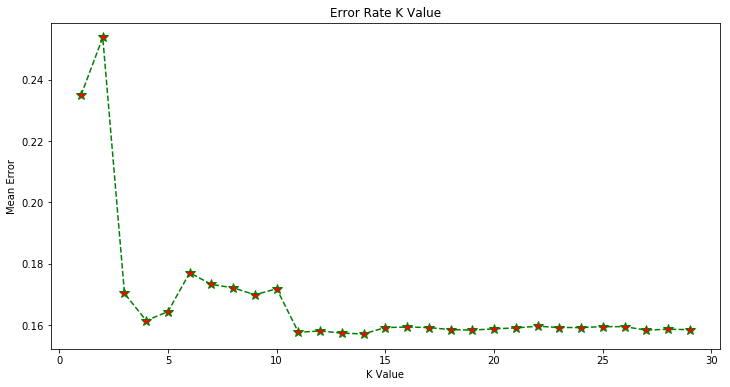

In [44]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 30), error, color='green', linestyle='dashed', marker='*',  
         markerfacecolor='red', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()

In [49]:
#As we can see k=3 is not the best option. We can try k=11 or k=14
classifier = KNeighborsClassifier(n_neighbors=14)  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test) 
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[2315  544]
 [ 573 3679]]
             precision    recall  f1-score   support

          f       0.80      0.81      0.81      2859
          m       0.87      0.87      0.87      4252

avg / total       0.84      0.84      0.84      7111



In [50]:
#As we can see k=14 gives better results